In [1]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from mtdnetwork.statistic.utils import decorate, savefig
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')

from run import single_mtd_simulation

current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')

In [2]:
single_results = []
single_results_avg = []
single_results_mttc = []
single_results_mttc_avg = []

for i in range(20):
    evaluations, mttc_10_timestamp = single_mtd_simulation()
    single_results.append(evaluations)
    single_results_mttc.append(mttc_10_timestamp)

Finished simulation for NoMTD!
Finished simulation for CompleteTopologyShuffle!
Finished simulation for IPShuffle!
Finished simulation for OSDiversity!
Finished simulation for PortShuffle!
Finished simulation for ServiceDiversity!
Finished simulation for NoMTD!
Finished simulation for CompleteTopologyShuffle!
Finished simulation for IPShuffle!
Finished simulation for OSDiversity!
Finished simulation for PortShuffle!
Finished simulation for ServiceDiversity!
Finished simulation for NoMTD!
Finished simulation for CompleteTopologyShuffle!
Finished simulation for IPShuffle!
Finished simulation for OSDiversity!
Finished simulation for PortShuffle!
Finished simulation for ServiceDiversity!
Finished simulation for NoMTD!
Finished simulation for CompleteTopologyShuffle!
Finished simulation for IPShuffle!
Finished simulation for OSDiversity!
Finished simulation for PortShuffle!
Finished simulation for ServiceDiversity!
Finished simulation for NoMTD!
Finished simulation for CompleteTopologyShuff

In [3]:
for i in range(len(single_results_mttc[0])):
    single_results_mttc_avg.append({
        'Name': single_results_mttc[0][i]['Name'],
        'Time': single_results_mttc[0][i]['Time'],
        'MTD Interval': single_results_mttc[0][i]['MTD Interval'],
        'Mean Time to Compromise': sum([r[i]['Mean Time to Compromise'] for r in single_results_mttc]) / len(single_results_mttc),
    })
pd.DataFrame(single_results_mttc_avg).to_csv('experimental_data/single_mtd_sim_mttc.csv', index=False)
single_results_mttc_avg = pd.read_csv("experimental_data/single_mtd_sim_mttc.csv")
single_results_mttc_avg

,Name,Time,MTD Interval,Mean Time to Compromise
0,NoMTD,999.715656,100,95.136179
1,NoMTD,1999.431312,100,86.458970
2,NoMTD,2999.146968,100,71.052912
3,NoMTD,3998.862624,100,62.756864
4,NoMTD,4998.578280,100,56.544122
...,...,...,...,...
235,ServiceDiversity,5997.480485,300,57.801283
236,ServiceDiversity,6997.060566,300,54.186173
237,ServiceDiversity,7996.640647,300,50.984301
238,ServiceDiversity,8996.220728,300,49.142150


In [4]:
for i in range(len(single_results[0])):
    single_results_avg.append({
        'Name': single_results[0][i]['Name'],
        'MTD Interval': single_results[0][i]['MTD Interval'],
        'Mean Time to Compromise': sum([r[i]['MTTC'] for r in single_results]) / len(single_results),
        'MTD Execution Frequency': sum([r[i]['MEF'] for r in single_results]) / len(single_results),
        'Attack Success Rate': sum([r[i]['ASR'] for r in single_results]) / len(single_results),
        'Compromised Num': sum([r[i]['Compromised Num'] for r in single_results]) / len(single_results)
    })

pd.DataFrame(single_results_avg).to_csv('experimental_data/single_mtd_sim.csv', index=False)

In [5]:
single_results_avg = pd.read_csv("experimental_data/single_mtd_sim.csv")
single_results_mttc_avg = pd.read_csv("experimental_data/single_mtd_sim_mttc.csv")

## Mean Time to Compromise with Different MTD Triggering Interval in 10000s simulation time

Saving figure to file experimental_data/single_mtd_sim_mttc.jpg


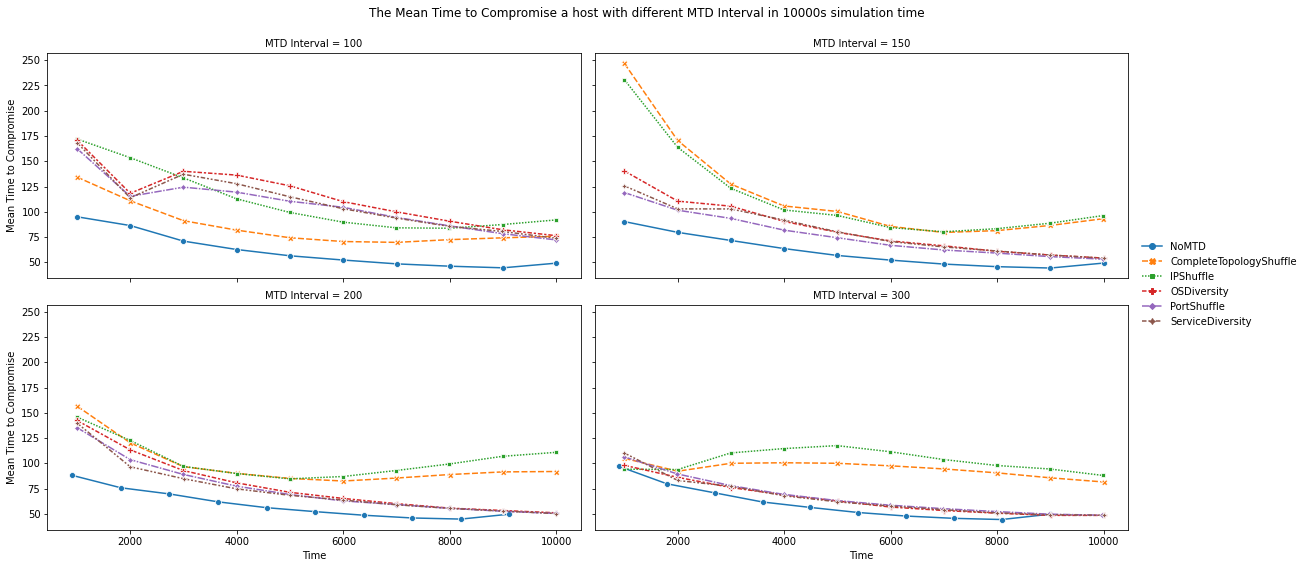

In [10]:
# single_results_mttc_avg = single_results_mttc_avg[single_results_mttc_avg['MTD Interval'] == 100]
# plt.figure(figsize=(17, 10))
# sns.lineplot(data=single_results_mttc_avg, x='Time', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)
# plt.show()
g = sns.FacetGrid(single_results_mttc_avg, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Time", y="Mean Time to Compromise", style='Name', hue='Name', markers=True)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('The Mean Time to Compromise a host with different MTD Interval in 10000s simulation time')
savefig('experimental_data/single_mtd_sim_mttc.jpg')
plt.show()

## The number of hosts being compromised at 10000s simulation time with 4 different MTD triggering interval

Saving figure to file experimental_data/single_mtd_sim_cn.jpg


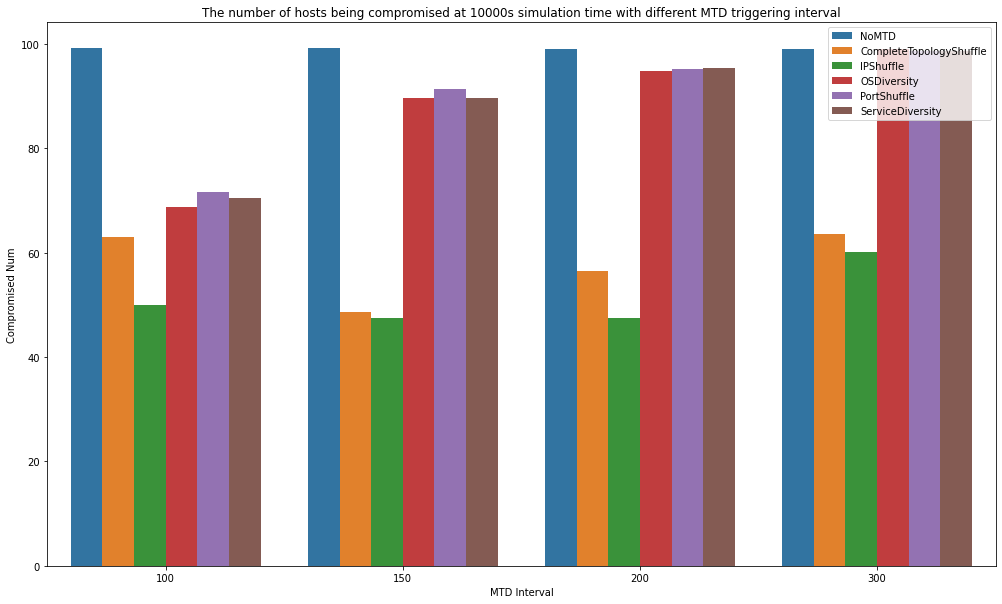

In [11]:
# plt.figure(figsize=(17, 10))
# sns.lineplot(data=single_results_avg, x='MTD Interval', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)
# plt.show()
plt.figure(figsize=(17, 10))
sns.barplot(data=single_results_avg, x='MTD Interval', y='Compromised Num', hue='Name')
plt.legend(loc='upper right')
plt.title('The number of hosts being compromised at 10000s simulation time with different MTD triggering interval')
savefig('experimental_data/single_mtd_sim_cn.jpg')
plt.show()

## Attack Success Rate at 10000s simulation time

Saving figure to file experimental_data/single_mtd_sim_asr.jpg


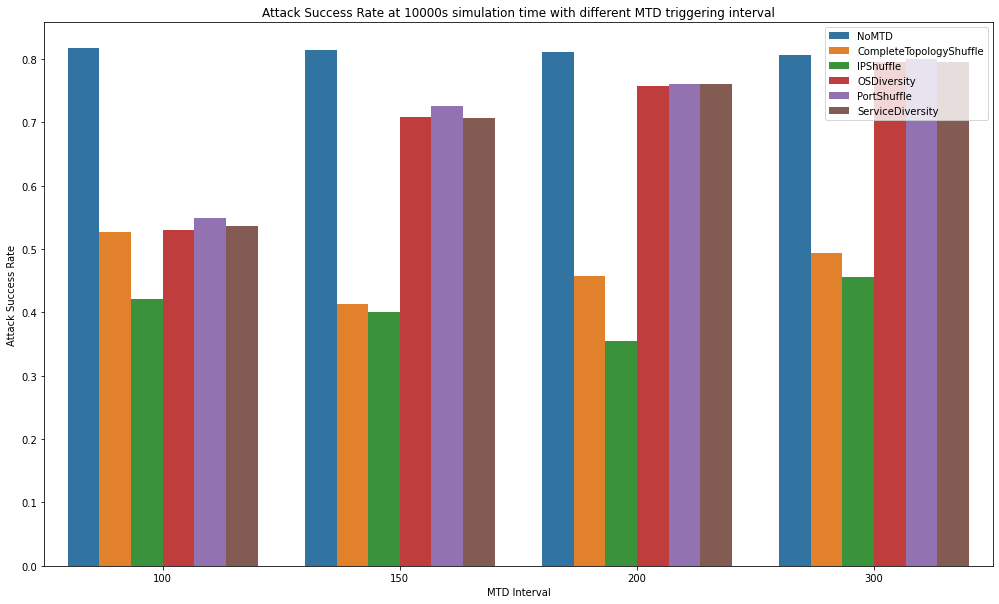

In [12]:
plt.figure(figsize=(17, 10))
sns.barplot(data=single_results_avg, x='MTD Interval', y='Attack Success Rate', hue='Name')
plt.legend(loc='upper right')
plt.title('Attack Success Rate at 10000s simulation time with different MTD triggering interval')
savefig('experimental_data/single_mtd_sim_asr.jpg')
plt.show()
